In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics


In [2]:
data_path = '/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data'

In [3]:
import os

folders = ['Bike', 'Car']

for folder in folders:
  folder_path = os.path.join(data_path, folder)
  num_files = 0

  if os.path.exists(folder_path) and os.path.isdir(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            num_files += 1
    print(f'The folder "{folder}" contains {num_files} files.')
  else:
    print(f'The folder "{folder}" does not exist or is not a directory.')


The folder "Bike" contains 200 files.
The folder "Car" contains 200 files.


In [4]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image


folders = ['Bike', 'Car']

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((227, 227)), # Resize to 227x227
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Process images and extract features
features_data = []
for folder in folders:
    folder_path = os.path.join(data_path, folder)
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')): # Add more image extensions if needed
                file_path = os.path.join(folder_path, filename)
                try:
                    img = Image.open(file_path).convert('RGB') # Handle potential image format issues
                    features = transform(img)


                    features_data.append({
                        'filename': filename,
                        'folder': folder,
                        'features': features.numpy() # Convert to numpy array for easier handling
                    })

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
    else:
        print(f'The folder "{folder}" does not exist or is not a directory.')

# Now features_data contains the extracted features for each image along with filename and folder
print(f"Total images processed: {len(features_data)}")

Total images processed: 400


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 109M/109M [00:00<00:00, 175MB/s]



image 1/1 /content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data/Car/Car (100).jpeg: 448x640 2 cars, 5619.5ms
Speed: 15.7ms preprocess, 5619.5ms inference, 50.6ms postprocess per image at shape (1, 3, 448, 640)
tensor([2., 2.])
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'ca

array([[[251, 247, 236],
        [233, 229, 218],
        [255, 255, 242],
        ...,
        [143, 145, 153],
        [151, 153, 161],
        [145, 147, 155]],

       [[245, 241, 230],
        [248, 244, 233],
        [240, 239, 225],
        ...,
        [143, 145, 153],
        [151, 153, 161],
        [145, 147, 155]],

       [[247, 243, 232],
        [250, 246, 235],
        [234, 233, 219],
        ...,
        [144, 146, 154],
        [151, 153, 161],
        [146, 148, 156]],

       ...,

       [[203, 205, 213],
        [203, 205, 213],
        [203, 205, 213],
        ...,
        [138, 161, 187],
        [138, 161, 187],
        [139, 162, 188]],

       [[203, 205, 213],
        [203, 205, 213],
        [203, 205, 213],
        ...,
        [138, 161, 187],
        [138, 161, 187],
        [139, 162, 188]],

       [[203, 205, 213],
        [203, 205, 213],
        [203, 205, 213],
        ...,
        [138, 161, 187],
        [138, 161, 187],
        [139, 162, 188]]], dtype=uint8)
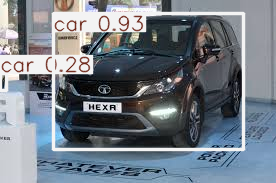

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("yolo11x.pt")
# Run inference on an image
results = model('/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data/Car/Car (100).jpeg')

# Observe results
print(results[0].boxes.cls)
print(results[0].names)
#plot the result

results[0].plot()

In [ ]:

import os
from PIL import Image

# Load a pretrained YOLOv8n model
model = YOLO("yolo11x.pt")

# Directory containing images
image_dir = '/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data/Bike'
output_dir = '/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data_crop/Bike_Crop'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for img in os.listdir(image_dir):
    image_path = os.path.join(image_dir, img)
    results = model(image_path)

    cls_values = results[0].boxes.cls

    if len(cls_values) == 0:
        # If no objects detected, copy the original image to the output directory
        img_pil = Image.open(image_path)
        img_pil.save(os.path.join(output_dir, img))
        print(f"No objects detected in {img}, copied original image.")
    else:
        # Find the index of the object with class 3 and the highest confidence
        max_conf_index = -1
        max_conf = -1
        for i, cls in enumerate(cls_values):
            if cls == 3 and results[0].boxes.conf[i] > max_conf:
                max_conf = results[0].boxes.conf[i]
                max_conf_index = i

        if max_conf_index != -1:
            box = results[0].boxes[max_conf_index]

            # Crop the image
            img_pil = Image.open(image_path)
            xmin, ymin, xmax, ymax = box.xyxy[0].tolist()

            # Calculate square crop dimensions
            width = xmax - xmin
            height = ymax - ymin
            size = max(width, height)
            center_x = (xmin + xmax) / 2
            center_y = (ymin + ymax) / 2

            left = max(0, int(center_x - size / 2))
            top = max(0, int(center_y - size / 2))
            right = min(img_pil.width, int(center_x + size / 2))
            bottom = min(img_pil.height, int(center_y + size/2))

            cropped_image = img_pil.crop((left, top, right, bottom))

            # Save the cropped image
            cropped_image.save(os.path.join(output_dir, img))
        else:
          # If class 3 is not detected copy the original image to the output directory
          img_pil = Image.open(image_path)
          img_pil.save(os.path.join(output_dir, img))
          print(f"Class 3 not detected in {img}, copied original image.")


In [ ]:
# Load a pretrained YOLOv8n model
model = YOLO("yolo11x.pt")

# Directory containing images
image_dir = '/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data/Car'
output_dir = '/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data_crop/Car_Crop'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

for img in os.listdir(image_dir):
    image_path = os.path.join(image_dir, img)
    results = model(image_path)

    cls_values = results[0].boxes.cls

    if len(cls_values) == 0:
        # If no objects detected, copy the original image to the output directory
        img_pil = Image.open(image_path)
        img_pil.save(os.path.join(output_dir, img))
        print(f"No objects detected in {img}, copied original image.")
    else:
        # Find the indices of objects with class 2 or 7
        target_indices = [i for i, cls in enumerate(cls_values) if cls == 2 or cls == 7]

        if not target_indices:
            # If neither class 2 nor 7 is detected, copy the original image
            img_pil = Image.open(image_path)
            img_pil.save(os.path.join(output_dir, img))
            print(f"Neither class 2 nor 7 detected in {img}, copied original image.")
            continue

        # Find the largest bounding box among the target classes
        max_area = -1
        max_area_index = -1
        for i in target_indices:
            box = results[0].boxes[i]
            xmin, ymin, xmax, ymax = box.xyxy[0].tolist()
            area = (xmax - xmin) * (ymax - ymin)
            if area > max_area:
                max_area = area
                max_area_index = i

        if max_area_index != -1:
            box = results[0].boxes[max_area_index]

            # Crop the image
            img_pil = Image.open(image_path)
            xmin, ymin, xmax, ymax = box.xyxy[0].tolist()

            # Calculate square crop dimensions
            width = xmax - xmin
            height = ymax - ymin
            size = max(width, height)
            center_x = (xmin + xmax) / 2
            center_y = (ymin + ymax) / 2

            left = max(0, int(center_x - size / 2))
            top = max(0, int(center_y - size / 2))
            right = min(img_pil.width, int(center_x + size / 2))
            bottom = min(img_pil.height, int(center_y + size/2))

            cropped_image = img_pil.crop((left, top, right, bottom))

            # Save the cropped image
            cropped_image.save(os.path.join(output_dir, img))
        else:
            # Shouldn't happen, but handle the case where no largest box is found.
            print(f"Error finding the largest bounding box in {img}, copied original image.")
            img_pil = Image.open(image_path)
            img_pil.save(os.path.join(output_dir, img))


In [15]:
import os
data_path = '/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data_crop/'
folders = ['Bike_Crop', 'Car_Crop']

for folder in folders:
  folder_path = os.path.join(data_path, folder)
  num_files = 0

  if os.path.exists(folder_path) and os.path.isdir(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            num_files += 1
    print(f'The folder "{folder}" contains {num_files} files.')
  else:
    print(f'The folder "{folder}" does not exist or is not a directory.')


The folder "Bike_Crop" contains 200 files.
The folder "Car_Crop" contains 200 files.


In [16]:
folders = ['Bike_Crop', 'Car_Crop']

for folder in folders:
  near_square_count = 0
  folder_path = os.path.join(data_path, folder)
  if os.path.exists(folder_path) and os.path.isdir(folder_path):
    for filename in os.listdir(folder_path):
      file_path = os.path.join(folder_path, filename)
      if os.path.isfile(file_path):
        try:
          img = Image.open(file_path)
          width, height = img.size
          if abs(width - height) <= 0.2 * max(width, height): # Check for near-square images
            near_square_count +=1
        except Exception as e:
          print(f"Error processing {filename}: {e}")
    print(f"Folder '{folder}' has {near_square_count} near-square images.")
  else:
    print(f"Folder '{folder}' not found.")


Folder 'Bike_Crop' has 158 near-square images.
Folder 'Car_Crop' has 138 near-square images.


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import random
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision.transforms import ToTensor, Normalize
from PIL import Image, ImageOps
import numpy as np
from matplotlib import pyplot as plt
import copy
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from collections import Counter

In [18]:
data_path = '/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 1/data_crop'


In [20]:
# Transform (không Augmentation)
transform = transforms.Compose([
    transforms.Resize((227, 227)),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Transform (có Augmentation)
transform_aug = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [21]:
original_dataset = datasets.ImageFolder(root=data_path)

class_indices = {class_idx: [] for class_idx in range(len(original_dataset.classes))}
for idx, (_, class_idx) in enumerate(original_dataset.samples):
    class_indices[class_idx].append(idx)

train_indices, test_indices = [], []

for class_idx, indices in class_indices.items():
    random.shuffle(indices)

    test_size = int(0.3 * len(indices))  #
    train_size = len(indices) - test_size

    test_class_samples = indices[:test_size]
    train_class_samples = indices[test_size:]

    test_indices.extend(test_class_samples)
    train_indices.extend(train_class_samples)

random.shuffle(train_indices)
random.shuffle(test_indices)

train_dataset = copy.deepcopy(original_dataset)
test_dataset = copy.deepcopy(original_dataset)

train_dataset.samples = [original_dataset.samples[i] for i in train_indices]
test_dataset.samples = [original_dataset.samples[i] for i in test_indices]

train_dataset.transform = transform
test_dataset.transform = transform

train_labels = [original_dataset.samples[i][1] for i in train_indices]
test_labels = [original_dataset.samples[i][1] for i in test_indices]

train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

print(f"Tổng số mẫu trong tập train: {len(train_dataset.samples)}")
print(f"Tổng số mẫu trong tập test: {len(test_dataset.samples)}")

print("\nSố lượng mẫu trong mỗi class của tập train:")
for class_idx, count in train_class_counts.items():
    print(f"Class {class_idx}: {count} mẫu")

print("\nSố lượng mẫu trong mỗi class của tập test:")
for class_idx, count in test_class_counts.items():
    print(f"Class {class_idx}: {count} mẫu")

Tổng số mẫu trong tập train: 280
Tổng số mẫu trong tập test: 120

Số lượng mẫu trong mỗi class của tập train:
Class 1: 140 mẫu
Class 0: 140 mẫu

Số lượng mẫu trong mỗi class của tập test:
Class 0: 60 mẫu
Class 1: 60 mẫu


In [22]:
num_augment_copies = 4  # 4x280 = 1120
aug_datasets = [copy.deepcopy(train_dataset) for _ in range(num_augment_copies)]

for aug_dataset in aug_datasets:
    aug_dataset.transform = transform_aug

dataset = ConcatDataset([train_dataset] + aug_datasets)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Tổng số ảnh train (gốc): {len(train_dataset)}, Augmented train: {len(dataset) - len(train_dataset)}, Tổng dataset: {len(dataset)}, Test: {len(test_dataset)}")

for images, labels in train_loader:
    print("Shape of images:", images.shape)
    break

Tổng số ảnh train (gốc): 280, Augmented train: 1120, Tổng dataset: 1400, Test: 120
Shape of images: torch.Size([32, 3, 227, 227])


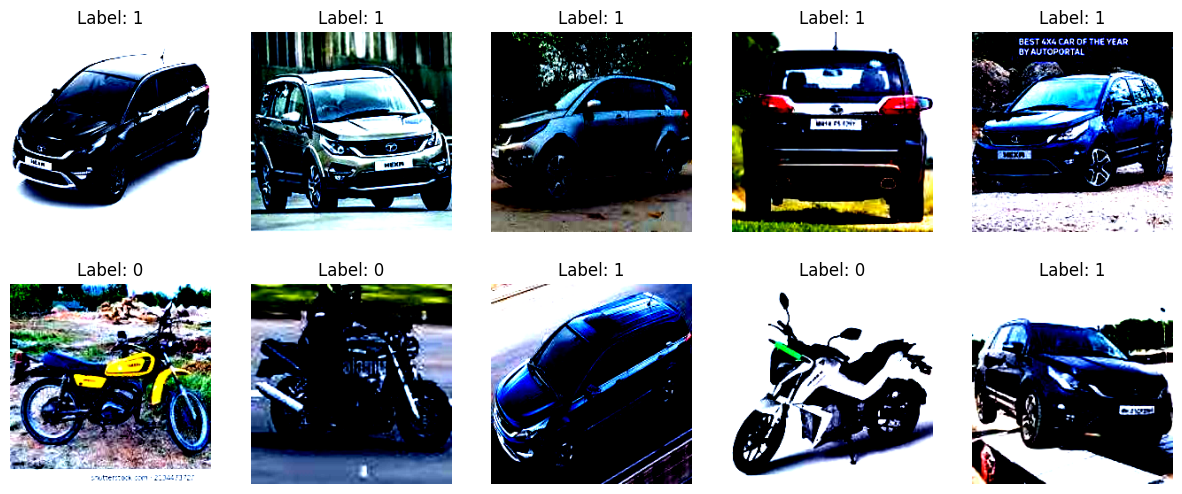

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for idx, i in enumerate(range(100, 110)):
    img, label = train_dataset[i]
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)
    ax = axes[idx // 5, idx % 5]
    ax.imshow(img)
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.show()

In [24]:
# AlexNet
alexnet = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

# Freeze feature extractor
for param in alexnet.features.parameters():
    param.requires_grad = False

num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, 2)

optimizer = optim.Adam(alexnet.classifier.parameters(), lr=1e-6)
criterion = nn.CrossEntropyLoss()

def train(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()

    loss_history = []
    acc_history = []

    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

        for images, labels in progress_bar:
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            progress_bar.set_postfix(loss=loss.item(), acc=correct / total)

        epoch_loss = total_loss / len(train_loader)
        epoch_acc = correct / total
        loss_history.append(epoch_loss)
        acc_history.append(epoch_acc)

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    fig, ax1 = plt.subplots(figsize=(8, 5))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:red')
    ax1.plot(range(1, num_epochs+1), loss_history, color='tab:red', marker='o', label='Loss')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy', color='tab:blue')
    ax2.plot(range(1, num_epochs+1), acc_history, color='tab:blue', marker='s', linestyle='dashed', label='Accuracy')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.tight_layout()
    plt.title("Training Loss & Accuracy")
    plt.show()

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    class_names = test_loader.dataset.classes

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 49.4MB/s]


Epoch 1/7: 100%|██████████| 44/44 [01:45<00:00,  2.41s/it, acc=0.284, loss=0.958]


Epoch 1/7, Loss: 1.0910, Accuracy: 0.2836


Epoch 2/7: 100%|██████████| 44/44 [01:38<00:00,  2.23s/it, acc=0.436, loss=0.819]


Epoch 2/7, Loss: 0.8613, Accuracy: 0.4357


Epoch 3/7: 100%|██████████| 44/44 [01:37<00:00,  2.21s/it, acc=0.57, loss=0.591]


Epoch 3/7, Loss: 0.7094, Accuracy: 0.5700


Epoch 4/7: 100%|██████████| 44/44 [01:37<00:00,  2.21s/it, acc=0.699, loss=0.438]


Epoch 4/7, Loss: 0.5694, Accuracy: 0.6986


Epoch 5/7: 100%|██████████| 44/44 [01:48<00:00,  2.47s/it, acc=0.801, loss=0.452]


Epoch 5/7, Loss: 0.4724, Accuracy: 0.8007


Epoch 6/7: 100%|██████████| 44/44 [01:36<00:00,  2.20s/it, acc=0.849, loss=0.235]


Epoch 6/7, Loss: 0.3881, Accuracy: 0.8486


Epoch 7/7: 100%|██████████| 44/44 [01:38<00:00,  2.24s/it, acc=0.892, loss=0.331]


Epoch 7/7, Loss: 0.3451, Accuracy: 0.8921


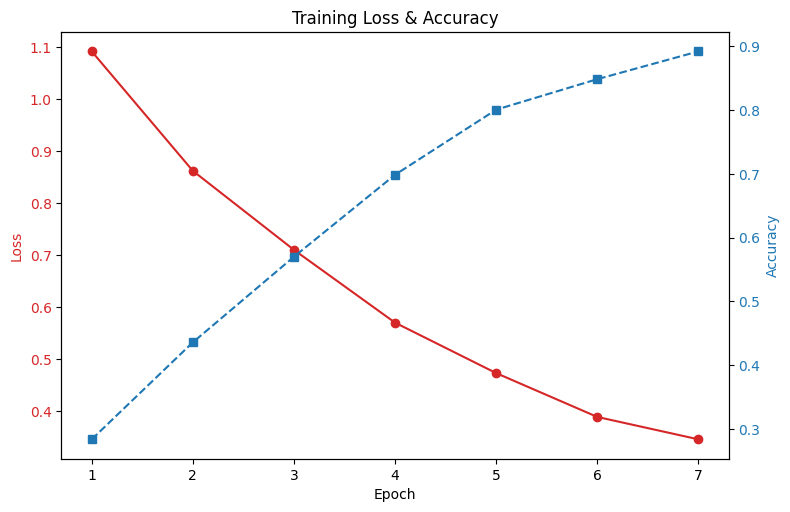

In [25]:
train(alexnet, train_loader, criterion, optimizer, num_epochs=7)

Classification Report:
              precision    recall  f1-score   support

   Bike_Crop       0.89      0.90      0.89        60
    Car_Crop       0.90      0.88      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



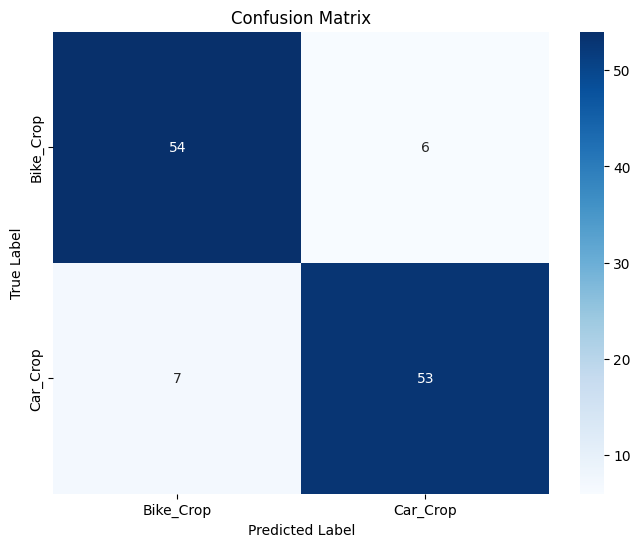

In [26]:
evaluate_model(alexnet, test_loader)